# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [3]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    # your code
    
    return 'Iris-setosa'


In [4]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3333333333333333


In [5]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [6]:
df["species"] = df["species"].astype('category')
df["species"] = df["species"].cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


As the species column is in string datatype , i changed it to int using label encoding.

In [7]:
matrix= df.values
print(matrix)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

In [8]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
dfP = pd.DataFrame(pca.fit_transform(df.iloc[:, :4]), columns=['pc1','pc2'])
dfP

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


PCA - Principal Component Analysis.
A statistical method called principal component analysis (PCA) is used to make a dataset less dimensional while retaining the majority of its variation.
A dataset with several variables (such as dataset characteristics) is subjected to PCA, which identifies a new collection of variables—known as principle components—that best account for the data's volatility. These main components are uncorrelated linear combinations of the initial variables that are orthogonal to one another.

In [10]:
dfM = df.join(dfP)
dfM.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pc1,pc2
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925


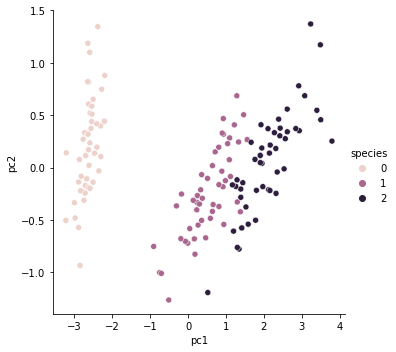

In [11]:
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.show()

<AxesSubplot:>

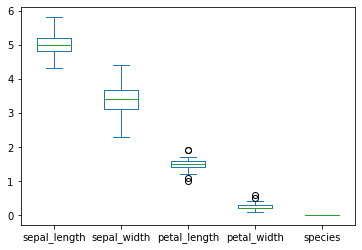

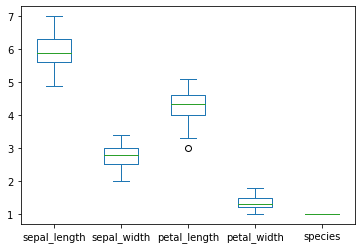

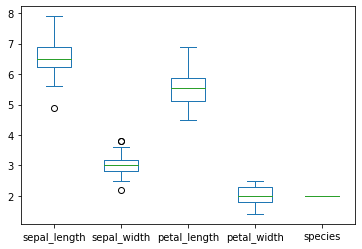

In [12]:
df[df['species']==0].plot.box()
df[df['species']==1].plot.box()
df[df['species']==2].plot.box()

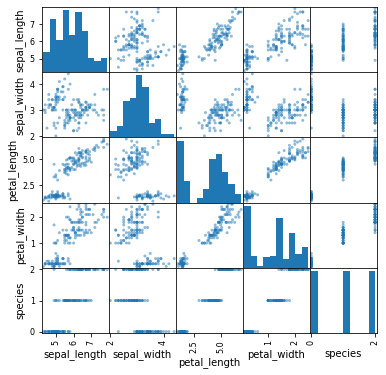

In [13]:
pd.plotting.scatter_matrix(df, figsize=(6,6))
plt.show()

From the scatter plot of pc1 and pc2 values, I have taken the values of pc1 and pc2 that differentiate the types of iris.
This is known as Rule - Based approach. 

In [29]:
# Create a new column 'true_class' in df based on the 'species' column
df['true_class'] = df['species'].apply(lambda x: 'A' if x == 0 else ('B' if x == 1 else 'C'))

# Create a new column 'predicted_class' in dfPca based on the rules
dfP.loc[(dfP['pc1'] < -2) & (dfP['pc2'] >= -1) & (dfP['pc2'] < 1.5), 'predicted_class'] = 'A'
dfP.loc[(dfP['pc1'] > -1) & (dfP['pc2'] > -1) & (dfP['pc2'] <= 1), 'predicted_class'] = 'B'
dfP.loc[(dfP['pc1'] > 1) & (dfP['pc2'] > -1) & (dfP['pc2'] <= 1), 'predicted_class'] = 'C'

# Merge df and dfPca on the index
dfM = df.join(dfP)

# Calculate the accuracy
accuracy = (dfM['true_class'] == dfM['predicted_class']).mean()

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.8866666666666667


In the above cell I have created a new column T based on the species column from original dataframe.
Then joined it with the dfP.
Checked whether the two columns have same value then calcualted the mean
